In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from Cleaner import Cleaner
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /home/maxime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/maxime/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r"../data/news_dataset.csv")

In [3]:
X, y = df.text, df.category

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
pipeline = Pipeline(steps=[
    ("Cleaner", Cleaner()),
    ("CountVectorizer", CountVectorizer(stop_words=stopwords.words('english'))),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=1000)),
])

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Cleaner', Cleaner()),
                ('CountVectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('RandomForestClassifier',
                 RandomForestClassifier(n_estimators=1000))])

In [7]:
y_pred = pipeline.predict(X_test)

<AxesSubplot: >

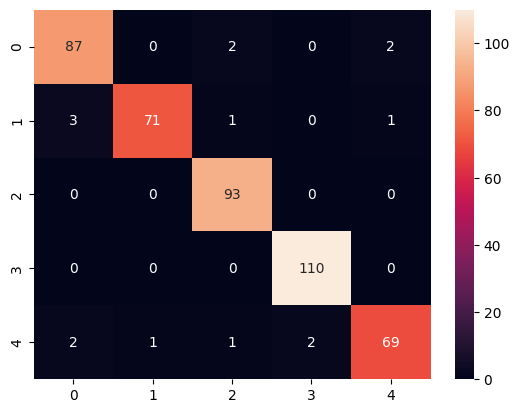

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [9]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.95      0.96      0.95        91
entertainment       0.99      0.93      0.96        76
     politics       0.96      1.00      0.98        93
        sport       0.98      1.00      0.99       110
         tech       0.96      0.92      0.94        75

     accuracy                           0.97       445
    macro avg       0.97      0.96      0.96       445
 weighted avg       0.97      0.97      0.97       445



In [10]:
accuracy_score(y_test, y_pred)

0.9662921348314607